In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import MaxNLocator

from collections import defaultdict
from typing import Dict, List

# from importlib import reload
# reload(plt)
# plt.xlabel("Hello World")

plt.rcParams['figure.figsize'] = [14, 8]

# Data for 2 and 3

In [85]:
PROBLEM_SIZES = [1, 5, 10]

# variant -> for size list of measurements
def plot_time(data: Dict[str, List[List[float]]]):
    for variant, measurements in data.items():
        variant_data = np.array(measurements) / 60
        
        mean_data = np.mean(variant_data, axis=1)
        std_data = np.std(variant_data, axis=1)
        plt.errorbar(PROBLEM_SIZES, mean_data, marker = 'o', yerr=std_data, linestyle='--', ecolor='red', legend=variant)
        
    #TODO
    plt.title("Execution time")
    plt.ylabel("Time [min]")
    plt.xlabel("Sizes")
    plt.show()

    
def plot_time(data_manager: DataManager, param: int, plot_title: str) -> np.ndarray:
    mean_data = []
    std_data = []
    
    threads_in_experiment = data_manager.get_thread_array()
    for thread_count in threads_in_experiment:
        data = data_manager.get(thread_count, param)
        mean_data.append(np.mean(data))
        std_data.append(np.std(data))
        
    plt.errorbar(threads_in_experiment, mean_data, marker = 'o', yerr=std_data, linestyle='--', ecolor='red')
    plt.title(plot_title)
    plt.ylabel("Time [s]")
    plt.xlabel("Thread count")
    plt.ylim(0)
    plt.show()
    # TODO: save
    return np.array(mean_data)

def plot_speedup_amdahl_relative(mean_times: np.ndarray, data_manager: DataManager, plot_title: str):
    base_time = mean_times[0]
    speedup = base_time / mean_times
    threads = data_manager.get_thread_array()
    
    plt.plot(threads, threads, color = 'r', label='y=x')
    plt.plot(threads, speedup, marker = 'o', linestyle='--')
    
    plt.title(plot_title)
    plt.ylabel("Speedup")
    plt.xlabel("Thread count")
    plt.ylim(0)
    plt.legend()
    plt.show()
    # TODO: save
    return speedup
    

def plot_efficiency(mean_times: np.ndarray, data_manager: DataManager, plot_title: str):
    base_time = mean_times[0]
    threads = data_manager.get_thread_array()
    efficiency = base_time / (threads * mean_times)
    
    plt.plot(threads, [0.8]*len(threads), color = 'r', label='y=0.8')
    plt.plot(threads, efficiency, marker = 'o', linestyle='--')
    
    plt.title(plot_title)
    plt.ylabel("Efficiency")
    plt.xlabel("Thread count")
    plt.legend()
    plt.show()
    # TODO: save
    
def plot_serial_fraction(speedup: np.ndarray, data_manager: DataManager, plot_title: str):
    threads = data_manager.get_thread_array()
    seq = (1 / speedup[1:] - 1 / threads[1:]) / (1 - 1 / threads[1:])
    
    plt.plot(threads[1:], seq, marker = 'o', linestyle='--')
    
    plt.title(plot_title)
    plt.ylabel("Serial fraction")
    plt.xlabel("Thread count")
    plt.xlim(0)
    plt.show()
    # TODO: save


def plot_parallel_costs(mean_times: np.ndarray, data_manager: DataManager, plot_title: str):
    base_time = mean_times[0]
    threads = data_manager.get_thread_array()
    costs = threads * mean_times - base_time
    
    plt.plot(threads, costs, marker = 'o', linestyle='--')
    
    plt.title(plot_title)
    plt.ylabel("Time cost [s]")
    plt.xlabel("Thread count")
    plt.show()
    # TODO: save

    
def plots_for_bucketing(data_manager: DataManager):
    mean_times = plot_time(data_manager, BUCKETING, bucketing_time_title)
    speedup = plot_speedup_amdahl_relative(mean_times, data_manager, bucketing_speedup_title)
    plot_efficiency(mean_times, data_manager, bucketing_efficiency_title)
    
def plots_for_merging(data_manager: DataManager):
    mean_times = plot_time(data_manager, BUCKET_MERGING, merging_time_title)
    plot_parallel_costs(mean_times, data_manager, merging_costs_title)
    
def plots_for_sorting(data_manager: DataManager):
    mean_times = plot_time(data_manager, SORTING, sorting_time_title)
    speedup = plot_speedup_amdahl_relative(mean_times, data_manager, sorting_speedup_title)
    plot_efficiency(mean_times, data_manager, sorting_efficiency_title)
    plot_serial_fraction(speedup, data_manager, sorting_serial_title)
    
def plots_for_rewriting(data_manager: DataManager):
    mean_times = plot_time(data_manager, REWRITING, rewriting_time_title)
    speedup = plot_speedup_amdahl_relative(mean_times, data_manager, rewriting_speedup_title)
    plot_efficiency(mean_times, data_manager, rewriting_efficiency_title)
    plot_serial_fraction(speedup, data_manager, rewriting_serial_title)
    
def plots_for_randoming(data_manager: DataManager):
    mean_times = plot_time(data_manager, RANDOMING, randoming_time_title)
    plot_speedup_amdahl_relative(mean_times, data_manager, randoming_speedup_title)
    
def plots_for_total(data_manager: DataManager):
    mean_times = plot_time(data_manager, TOTAL, total_time_title)
    speedup = plot_speedup_amdahl_relative(mean_times, data_manager, total_speedup_title)
    plot_efficiency(mean_times, data_manager, total_efficiency_title)
    plot_serial_fraction(speedup, data_manager, total_serial_title)

In [6]:
a = np.array([[1,2], [3,4], [5,6]])
np.mean(a,axis=1)

array([1.5, 3.5, 5.5])

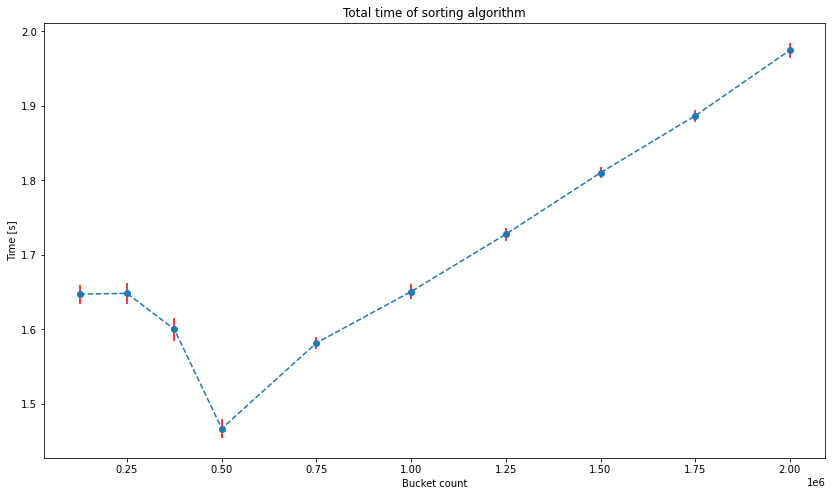

In [86]:
data_manager = read_time_output("test_sorting/slurm-21027351_final.out")
plot_total_time_by_buckets(data_manager)

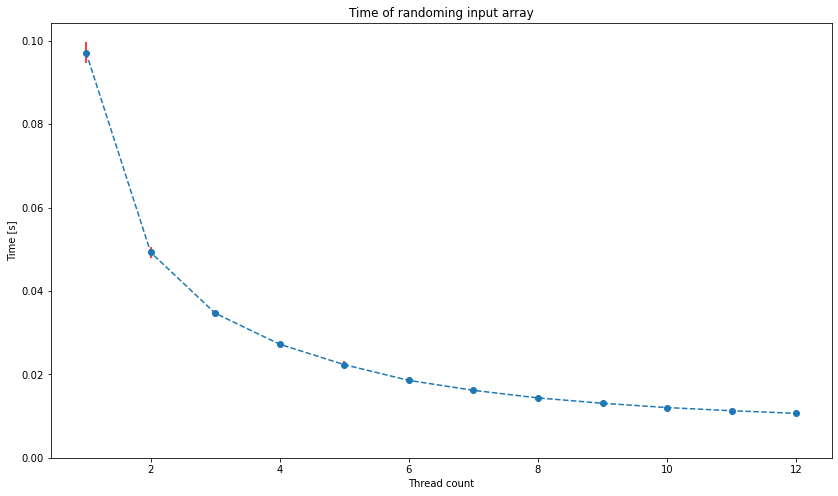

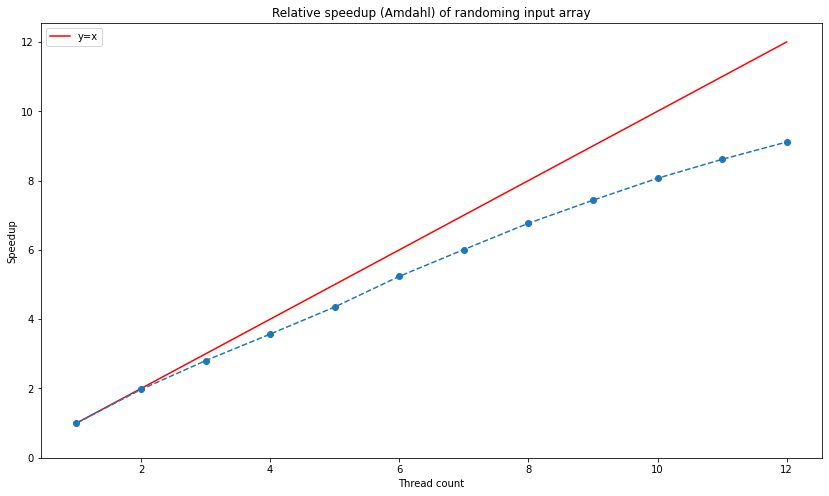

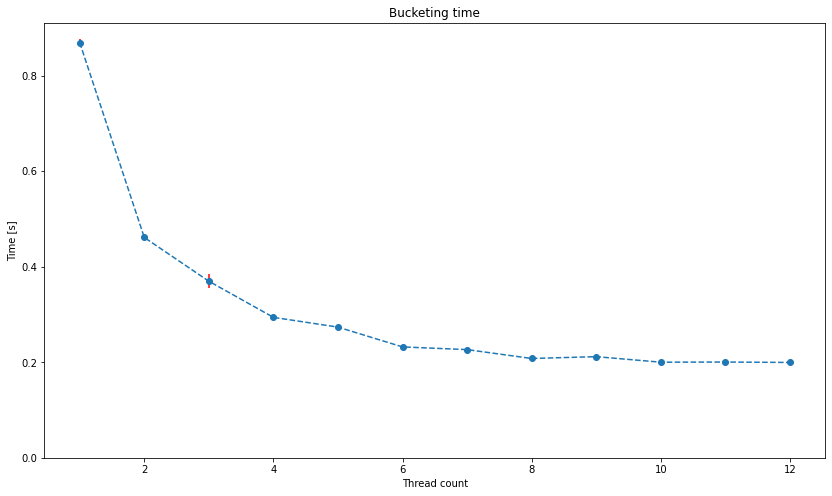

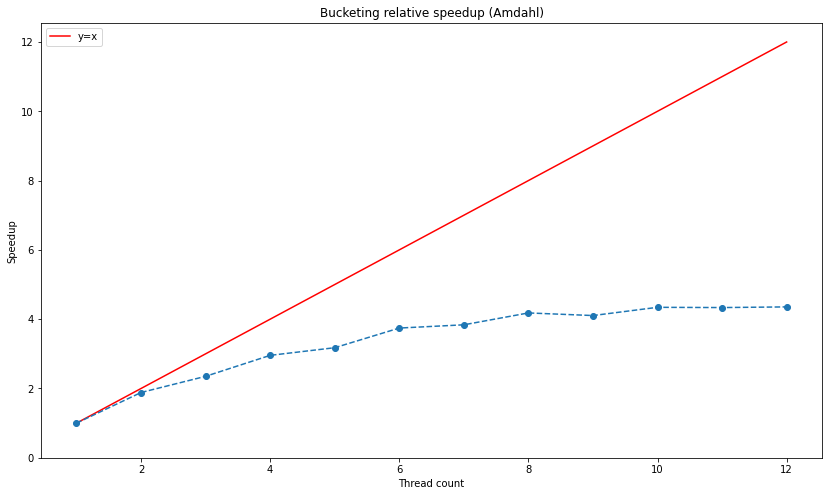

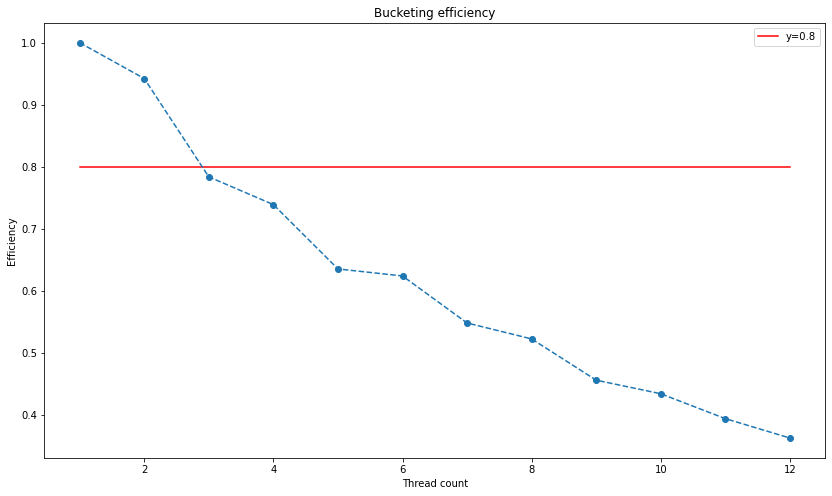

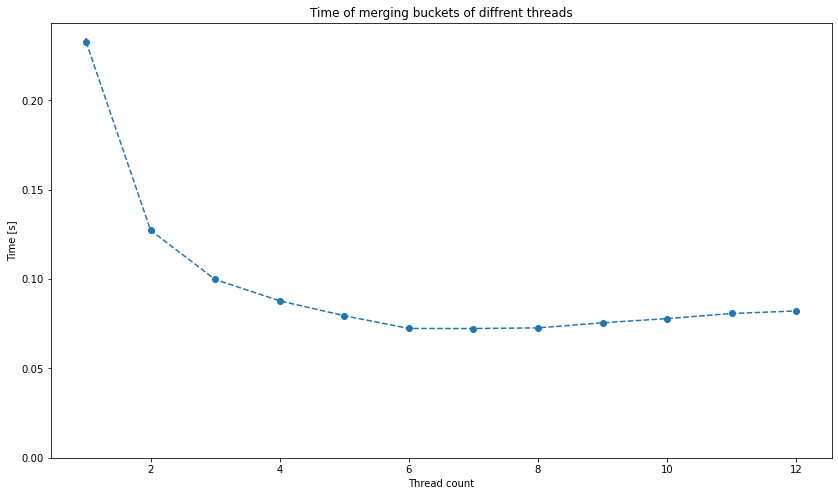

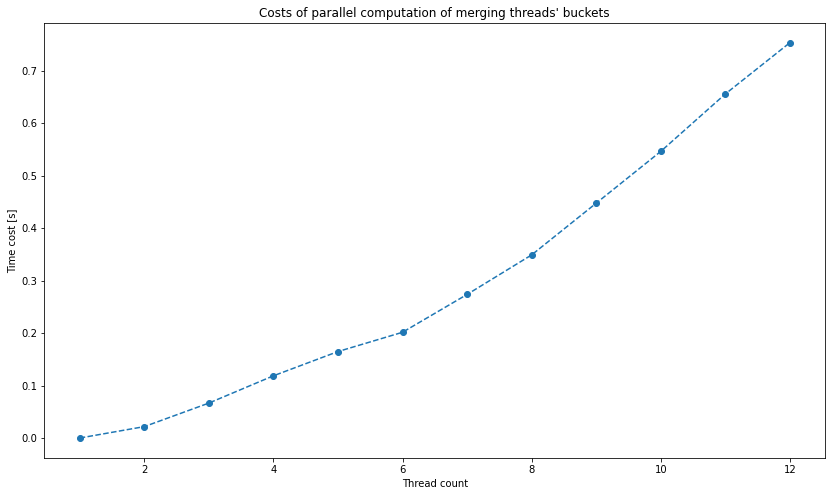

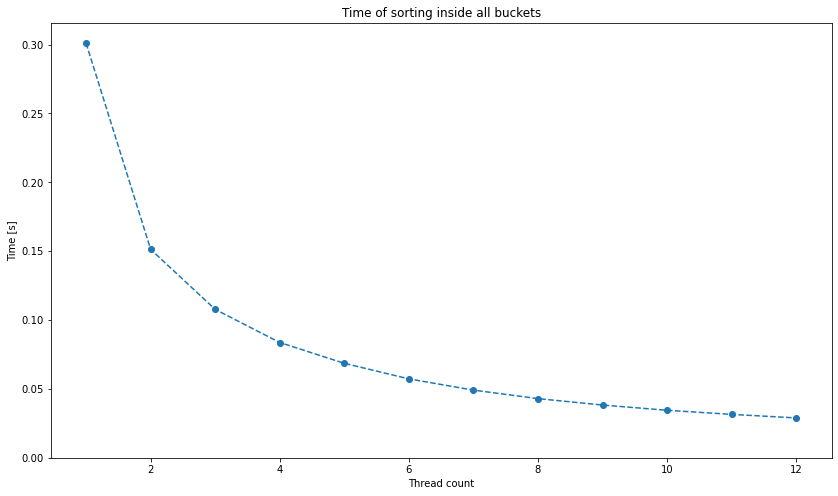

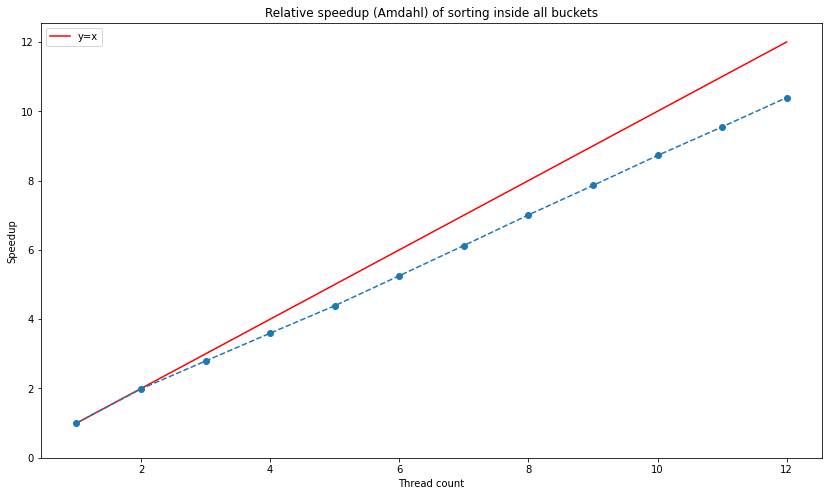

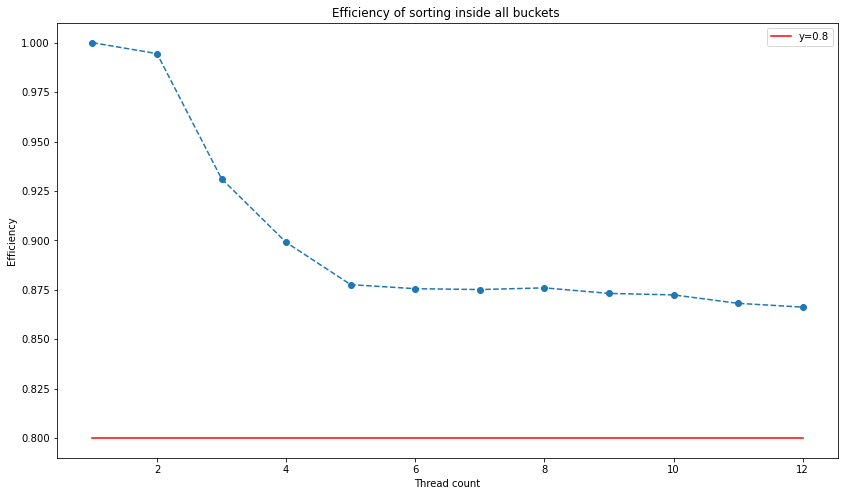

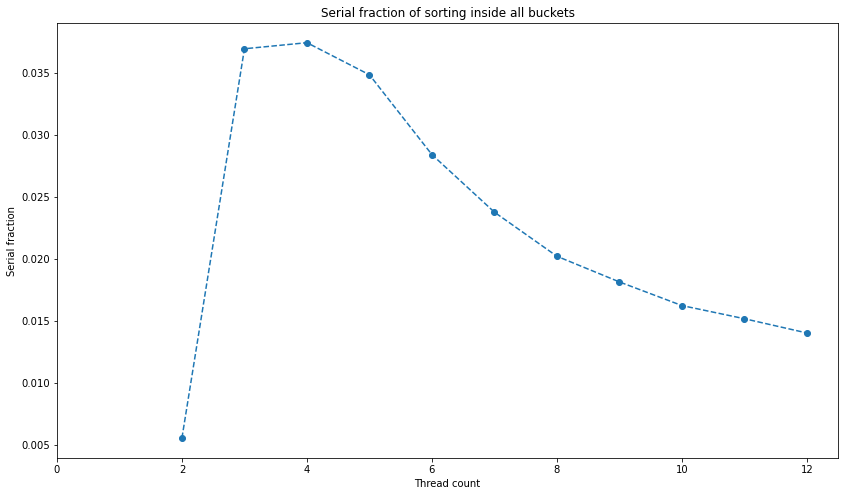

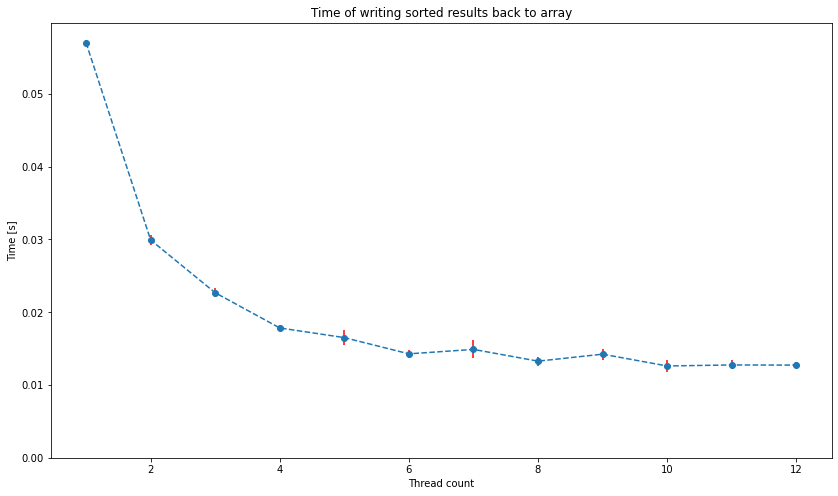

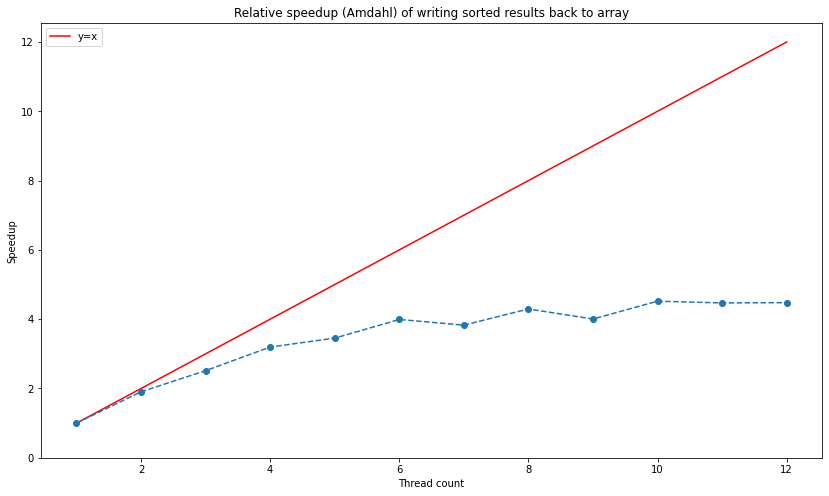

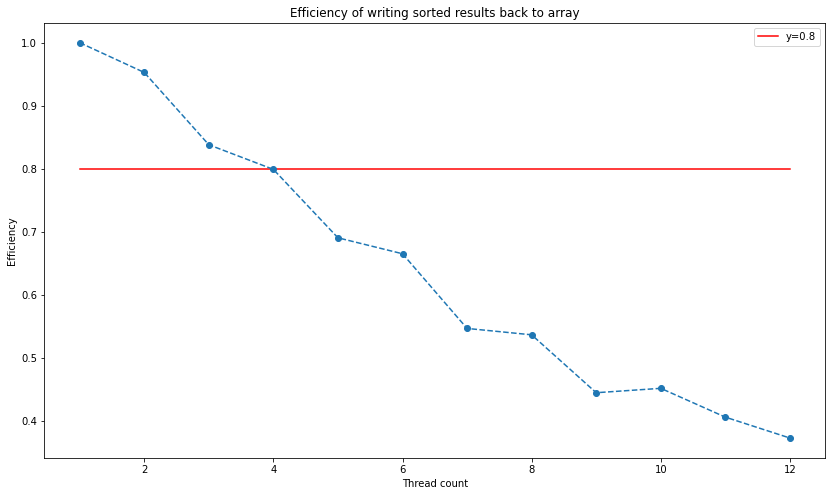

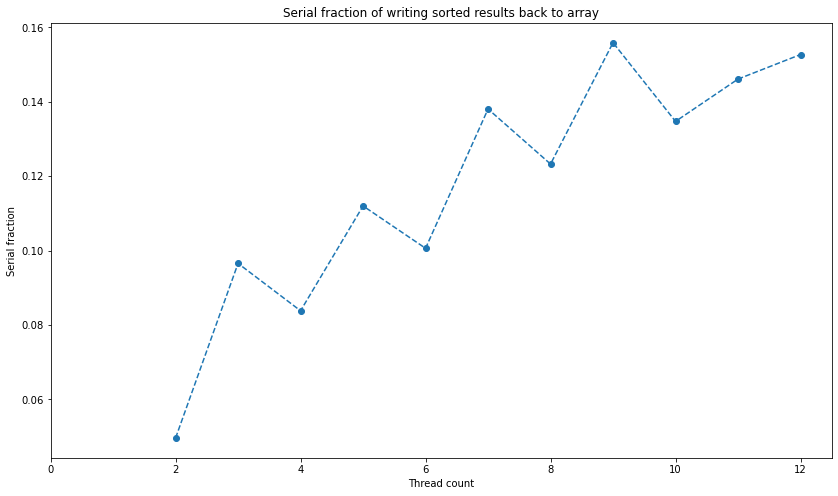

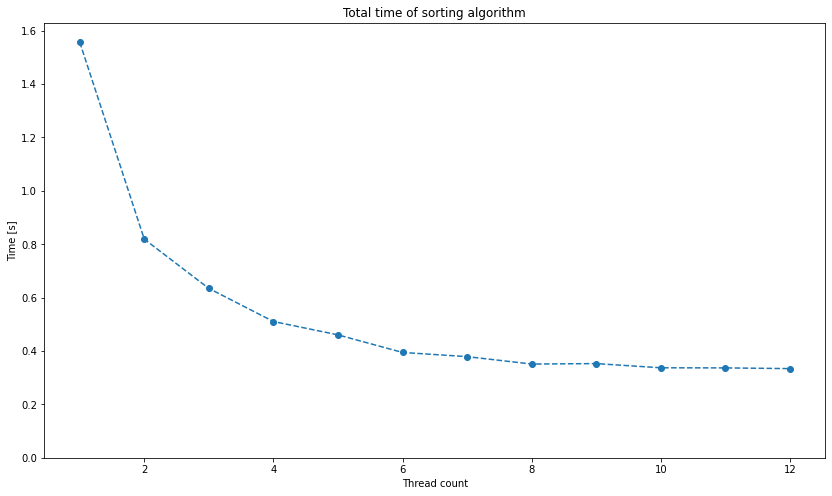

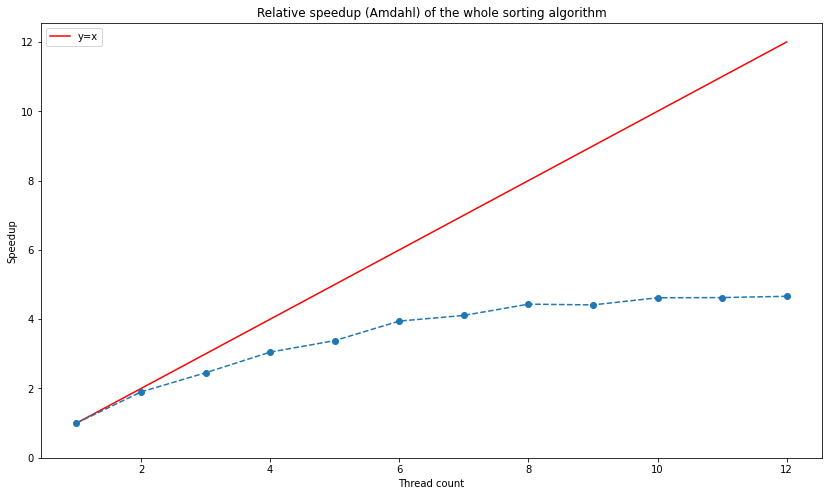

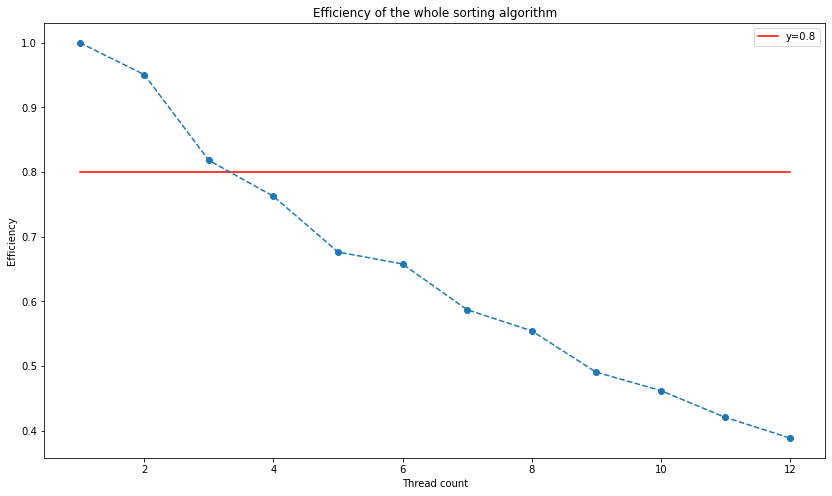

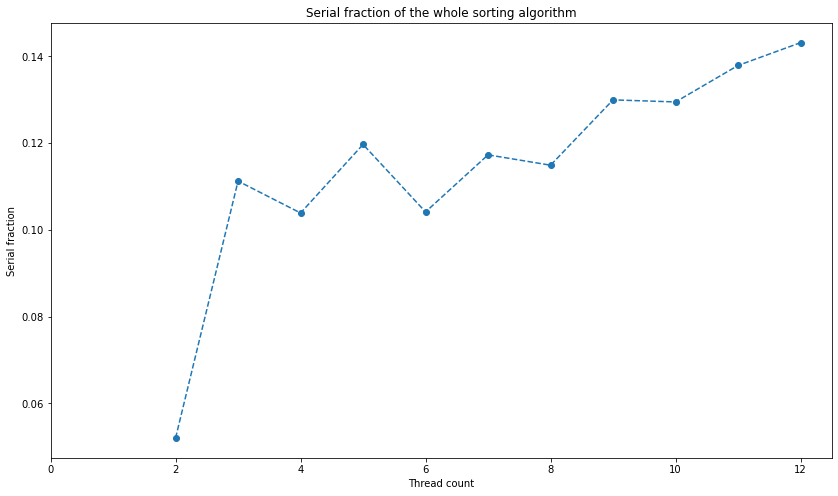

In [87]:
data_manager = read_time_output("slurm-21027258_final.out")
plots_for_randoming(data_manager)
plots_for_bucketing(data_manager)
plots_for_merging(data_manager)
plots_for_sorting(data_manager)
plots_for_rewriting(data_manager)
plots_for_total(data_manager)

In [ ]:
# DANGEROUS BELOW

In [31]:
PLOT_COLORS = ['b', 'g', 'orange']
SIZE_LABELS = ["small: ", "medium: ", "big: "]

class SlurmData:
    def __init__(self):
        self.point_counts = []
        self.pi_vals: Dict[int, List[float]] = defaultdict(lambda: [])
        self.times: Dict[int, List[float]] = defaultdict(lambda: [])
            
class DataAnaylzer:
    OUTLIERS = [(0, 3, 16), (0, 3, 17), (0, 7, 1), (2, 9, 16)]
    
    def __init__(self, slurm_data: List[SlurmData]):
        self.slurm_data = slurm_data
        for point_idx, proc_idx, test_idx in reversed(DataAnaylzer.OUTLIERS):
            point_count = self.slurm_data[0].point_counts[point_idx]
            self.slurm_data[test_idx].times[point_count][proc_idx] = -1
        
    def apply_on_times(self, reduce_function) -> SlurmData:
        res = SlurmData()
        for point_count in self.slurm_data[0].point_counts:
            res.point_counts.append(point_count)
            for i in range(0, 12):
                proc_times = np.array(list(map(lambda data: data.times[point_count][i],
                                               filter(lambda data: data.times[point_count][i] > 0,
                                                      self.slurm_data))))
                res.times[point_count].append(reduce_function(proc_times))
        return res
    
    def analyze_times_for_proc(self, p_idx: int, proc: int):
        point_count = self.slurm_data[0].point_counts[p_idx]
        res = []
        for data in self.slurm_data:
            res.append(data.times[point_count][proc])
        return res
    
def to_exp_string(number: float):
    pwr = 0
    while number >= 10:
        number /= 10
        pwr += 1
    number = round(number, 2)
    return '$' + str(number) + "*10^{" + str(pwr) + "}$"

def single_legend(i: int, number: float):
    return SIZE_LABELS[i] + to_exp_string(number) + " points"

def parse_single_slurm_file(filename: str):
    data = SlurmData()
    with open(filename, 'r') as handle:
        point_count = 0
        for line in handle.readlines():
            if line.startswith("Point count:"):
                point_count = int(line.split(':')[1])
                if point_count not in data.point_counts:
                    data.point_counts.append(point_count)
    
            elif line.startswith("Total time:"): 
                time = float(line.split(':')[1])
                data.times[point_count].append(time)
            elif line.startswith("PI value:"): 
                pi = float(line.split(':')[1])
                data.pi_vals[point_count].append(pi)
    return data

def read_slurm_files():
    total_data = []
    for filename in os.listdir("."):
        if filename.startswith("slurm"):
            total_data.append(parse_single_slurm_file(filename))
    return total_data

def plot_time(time_mean: SlurmData, time_std: SlurmData, num: int):
    point_count = time_mean.point_counts[num]
    plt.errorbar(range(1,13), time_mean.times[point_count], marker = 'o', color=PLOT_COLORS[num],
                 yerr=time_std.times[point_count], linestyle='--', ecolor='red', label=single_legend(num, point_count))
    plt.xlim(0)
    plt.title(f"Execution time on processors for {SIZE_LABELS[num][:-2]}")
    plt.ylabel("Time [s]")
    plt.xlabel("Processors")
    plt.legend()
    plt.savefig(f"time_{num}.png")
    plt.show()
    
def plot_speedup(time_mean: SlurmData):
    plt.plot(range(1,13), range(1,13), color = 'r', label='y=x')
    speedup_mapping = {}
    for i, point_count in enumerate(time_mean.point_counts):
        speedup = time_mean.times[point_count][0] / np.array(time_mean.times[point_count])
        speedup_mapping[point_count] = speedup
        data_to_plot = speedup
        plt.plot(range(1,13), data_to_plot, marker = 'o', color=PLOT_COLORS[i],
                 linestyle='--', label=single_legend(i, point_count))
    plt.ylim(0)
    plt.title("Speedup on processors")
    plt.ylabel("Speedup")
    plt.xlabel("Processors")
    plt.legend()
    plt.savefig("speedup.png")
    plt.show()
    return speedup_mapping
    
def plot_efficiency(time_mean: SlurmData):
    plt.plot(range(1,13), [1]*12, color = 'r')
    plt.plot(range(1,13), [0.8]*12, color = 'm', linestyle=':')
    proc_count = range(1,13)
    
    for i, point_count in enumerate(time_mean.point_counts):
        data_to_plot = time_mean.times[point_count][0] / (proc_count * np.array(time_mean.times[point_count]))
        plt.plot(range(1,13), data_to_plot, marker = 'o', color=PLOT_COLORS[i],
                 linestyle='--', label=single_legend(i, point_count))
    plt.ylim(0)
    plt.title("Efficiency on processors")
    plt.ylabel("Efficiency")
    plt.xlabel("Processors")
    plt.legend()
    plt.savefig("efficiency.png")
    plt.show()
    
def plot_serial_fraction(speedup: Dict[int, np.array]): 
    proc_count = np.array(range(2, 13))
    for i, point_count in enumerate(time_mean.point_counts):
        data_to_plot = (1 / speedup[point_count][1:]  -  1 / proc_count) / (1 - 1 / proc_count)
        plt.plot(range(2,13), data_to_plot, marker = 'o', color=PLOT_COLORS[i],
                 linestyle='--', label=single_legend(i, point_count))
    plt.ylim(0,1)
    plt.xlim(0)
    plt.title("Serial fraction on processors")
    plt.ylabel("Serial fraction")
    plt.xlabel("Processors")
    plt.legend()
    plt.savefig("sf.png")
    plt.show()

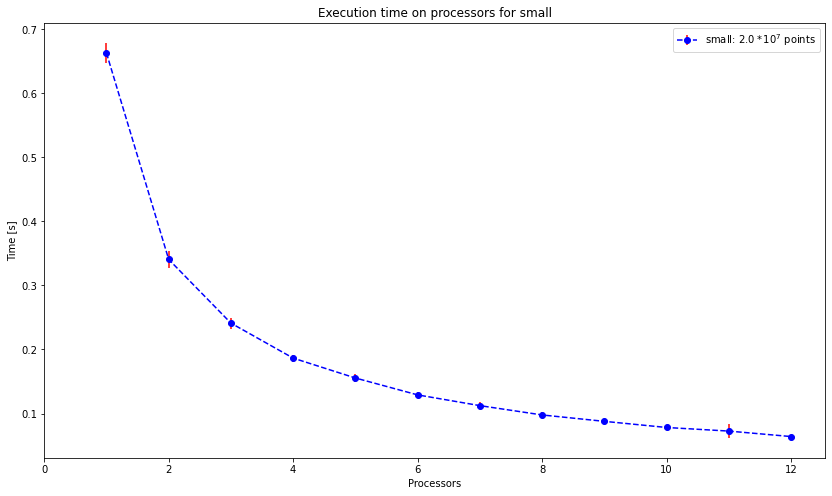

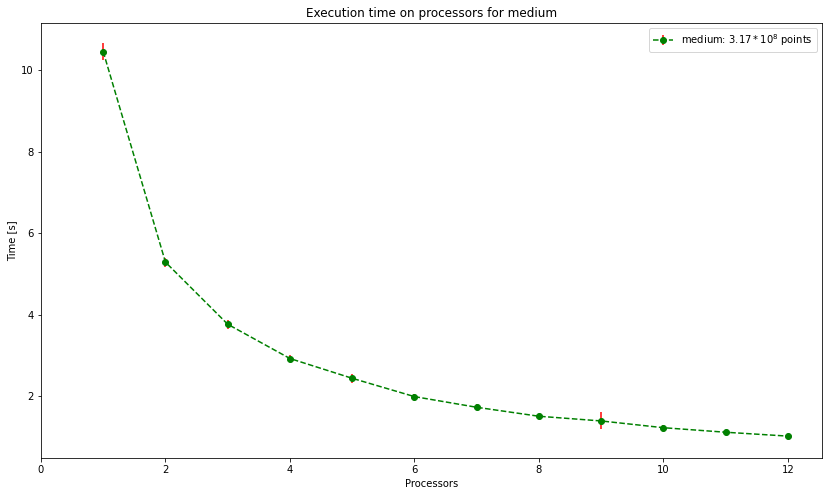

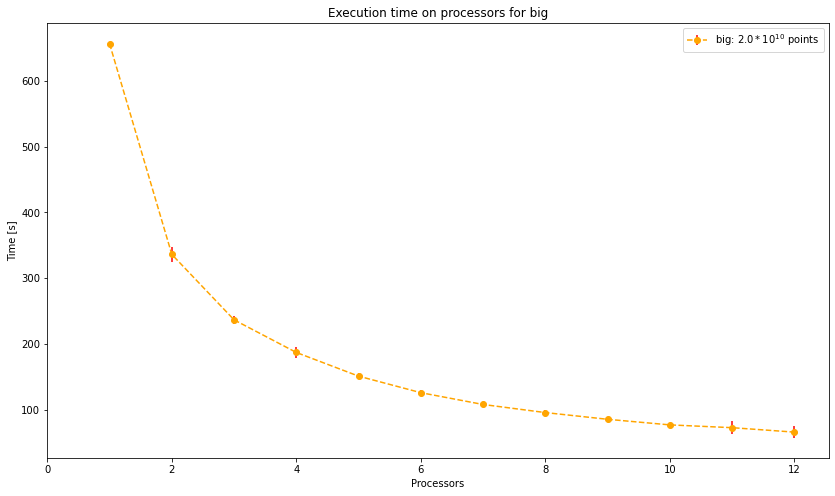

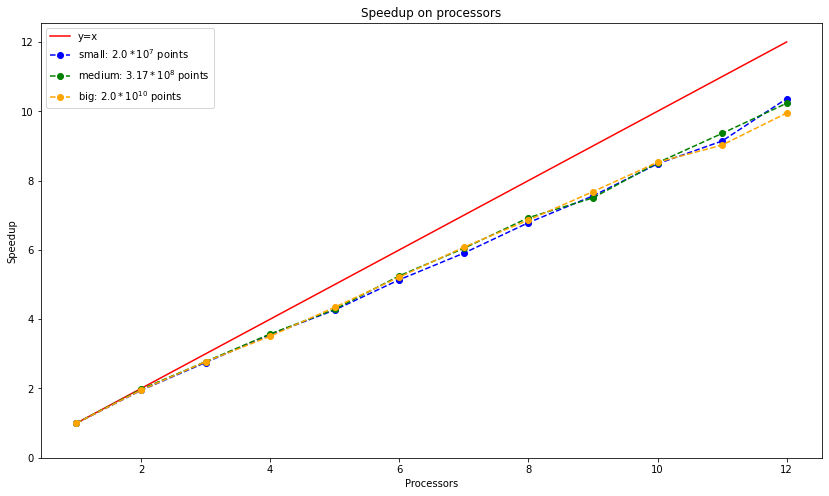

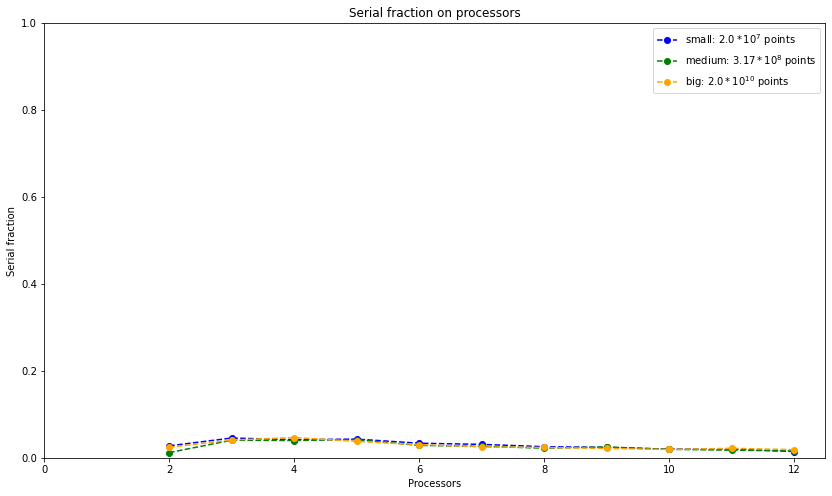

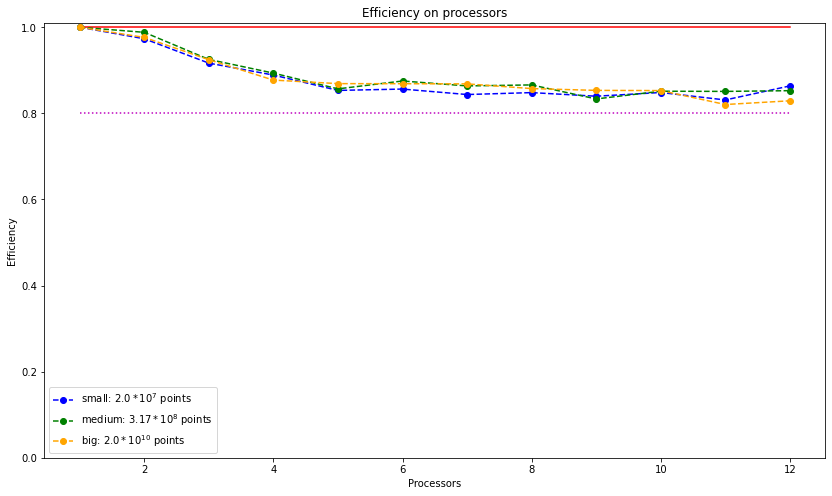

In [34]:
analyzer = DataAnaylzer(read_slurm_files())
time_mean = analyzer.apply_on_times(np.mean)
time_std = analyzer.apply_on_times(np.std)

plot_time(time_mean, time_std, 0)
plot_time(time_mean, time_std, 1)
plot_time(time_mean, time_std, 2)
plot_serial_fraction(plot_speedup(time_mean))
plot_efficiency(time_mean)

In [33]:
for x, y, z in zip(analyzer.analyze_times_for_proc(0, 3),
                   analyzer.analyze_times_for_proc(2, 3),
                   analyzer.analyze_times_for_proc(2, 9)):
    print(x, y, z)


0.183254 184.53227 82.544065
0.181096 180.687069 74.698006
0.185977 202.566413 74.60009
0.185076 183.829626 74.675059
0.186796 200.072203 74.686441
0.184825 183.981968 82.622992
0.185639 180.698349 82.548365
0.183909 183.160705 74.611384
0.201682 183.996494 74.65964
0.18557 180.32174 74.599061
0.186218 203.569451 82.545664
0.181477 180.442173 74.684252
0.18347 183.927826 74.685783
0.181402 200.075248 82.606797
0.183637 183.651181 74.678899
0.181418 180.949414 74.652735
-1 183.974056 -1
-1 200.002346 82.536047
0.182963 184.120478 74.684621
0.188861 180.709218 74.695442
0.190845 183.901108 74.669468
0.200788 180.690397 74.646568
0.188065 183.428129 74.674037
0.190875 199.57733 74.648615
0.185418 183.93264 82.496674
